## Feature Matching
Feature matching is a fundamental technique in computer vision that involves identifying and aligning corresponding features across multiple images. Features refer to distinctive elements in an image, such as edges, corners, or blobs, that can be consistently detected and described. By matching these features, computer vision systems can recognize objects, track movement, create panoramic images, and reconstruct 3D scenes from 2D images.

## Feature Matching Techniques

Feature matching involves comparing feature descriptors to find corresponding features across different images. Various techniques are employed to ensure accurate and efficient matching.

1. Keypoint Matching
Keypoint matching is the process of finding corresponding keypoints between different images by comparing their descriptors. The goal is to identify pairs of keypoints that represent the same physical point in the scene.

2. Brute-Force Matcher
The brute-force matcher compares each descriptor from one image with every descriptor from another image to find the best matches based on a chosen distance metric (e.g., Euclidean distance).

3. K-Nearest Neighbors (KNN) Matching
KNN matching finds the k closest descriptors for each keypoint based on a distance metric. Typically, the ratio test is applied to select the best match from the k neighbors.

4. RANSAC (Random Sample Consensus) for Robust Matching
RANSAC is an iterative method used to estimate parameters of a mathematical model from a set of observed data that contains outliers. In feature matching, RANSAC is used to find a robust set of matches by repeatedly selecting random subsets of matches and computing a transformation that aligns the images. The transformation with the highest number of inliers is chosen.

## Feature Matching Between Images Using ORB and RANSAC in OpenCV

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [11]:
## Load Images
img1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)  # Image 1
img2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)  # Image 2

In [12]:
# Check if the images are loaded properly
if img1 is None or img2 is None:
    print("Could not open or find the images.")
    exit()

### A. Feature Matching Between Images Using ORB

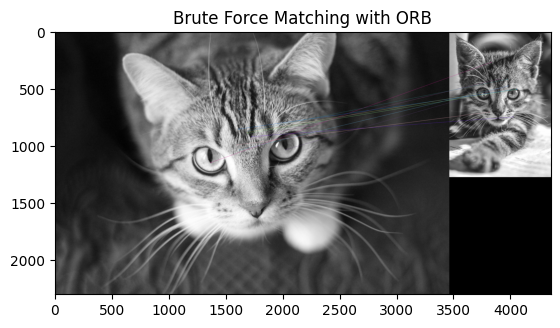

In [13]:
# Initialize ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1, des2)

# Sort them in the order of their distance.
matches = sorted(matches, key=lambda x: x.distance)

# Draw the top 10 matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
plt.imshow(img_matches)
plt.title('Brute Force Matching with ORB')
plt.show()

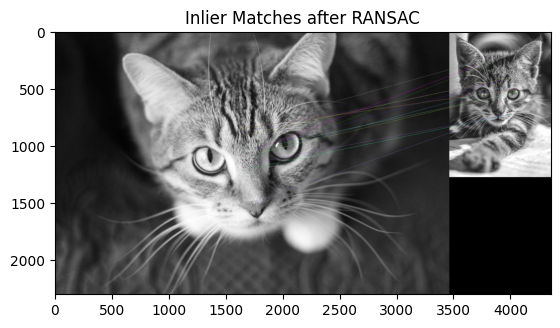

In [15]:
# Applying RANSAC to filter the matches
# Extract location of good matches
pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Find the fundamental matrix
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC)

# Select inlier points
pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]

# Draw the inlier matches
img_inliers = cv2.drawMatches(img1, kp1, img2, kp2, [m for i, m in enumerate(matches) if mask[i]], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the inlier matches
plt.imshow(img_inliers)
plt.title('Inlier Matches after RANSAC')
plt.savefig("test.png")
plt.show()